---

# Pandas

---



**Pandas** is a powerful and flexible open-source data analysis and manipulation library for **Python**.  
It provides data structures and functions designed to make working with structured data—such as tables or time series—fast, easy, and expressive.

### Key Features
- **DataFrame** and **Series** objects for efficient data handling.
- **Data cleaning** and **transformation** tools.
- **Indexing**, **slicing**, and **filtering** capabilities.
- Supports multiple data formats: CSV, Excel, SQL, JSON, and more.
- Built on top of **NumPy** for high performance.

### Common Use Cases
- Data loading and preprocessing.
- Exploratory data analysis (EDA).
- Handling missing data.
- Merging, joining, and grouping datasets.
- Time series analysis.

### Basic Import
```
import pandas as pd
```

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Pandas - Series

We'll start analyzing "The Group of Seven". Which is a political formed by Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. We'll start by analyzing population, and for that, we'll use a pandas.Series object.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# In millions
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])

In [ ]:
g7_pop

,0
0,35.467
1,63.951
2,80.940
3,60.665
4,127.061
5,64.511
6,318.523


In [ ]:
g7_pop.dtype

dtype('float64')

In [ ]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

In [ ]:
type(g7_pop.values)

numpy.ndarray

In [ ]:
g7_pop

,0
0,35.467
1,63.951
2,80.940
3,60.665
4,127.061
5,64.511
6,318.523



Compare it with the following table:

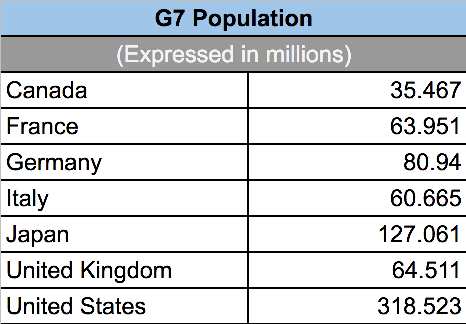

We can say that Series look like "ordered dictionaries". We can actually create Series out of dictionaries:

In [ ]:
pd.Series({
    'Canada': 35.467,
    'France': 63.951,
    'Germany': 80.94,
    'Italy': 60.665,
    'Japan': 127.061,
    'United Kingdom': 64.511,
    'United States': 318.523
}, name='G7 Population in millions')

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [ ]:
g7_pop = pd.Series(
    [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    index=['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States'],
    name='G7 Population in millions'
)

In [ ]:
g7_pop.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [ ]:
# You can also create Series out of other series, specifying indexes

new_series = pd.Series(g7_pop, index=['France', 'Germany', 'Italy', 'Spain'])
new_series

,G7 Population in millions
France,63.951
Germany,80.940
Italy,60.665
Spain,NaN


## Indexing

Indexing works similarly to lists and dictionaries, you use the index of the element you're looking for:

In [ ]:
g7_pop

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [ ]:
print(g7_pop['Canada'])
print(g7_pop['Japan'])

35.467
127.061


Numeric positions can also be used, with the `iloc` attribute:

In [ ]:
print(g7_pop.iloc[0])

35.467


In [ ]:
print(g7_pop.iloc[-1])

318.523


Selecting multiple elements at once:

In [ ]:
g7_pop[['Italy', 'France']]

,G7 Population in millions
Italy,60.665
France,63.951


In [ ]:
g7_pop.iloc[[0, 1]]

,G7 Population in millions
Canada,35.467
France,63.951


## Conditional selection (boolean arrays)

The same boolean array techniques we saw applied to numpy arrays can be used for Pandas Series:

In [ ]:
g7_pop

,G7 Population in millions
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [ ]:
g7_pop > 70

,G7 Population in millions
Canada,False
France,False
Germany,True
Italy,False
Japan,True
United Kingdom,False
United States,True


In [ ]:
g7_pop[g7_pop > 70]

,G7 Population in millions
Germany,80.940
Japan,127.061
United States,318.523


In [ ]:
print(g7_pop.mean())
print("\n", g7_pop[g7_pop > g7_pop.mean()])

107.30257142857144

 Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64


In [ ]:
g7_pop.std()

97.24996987121581

```
  ~ not
  | or
  & and
```

In [ ]:
g7_pop[(g7_pop > g7_pop.mean() - g7_pop.std() / 2) | (g7_pop > g7_pop.mean() + g7_pop.std() / 2)]

,G7 Population in millions
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [ ]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

,G7 Population in millions
Canada,35.467
Germany,80.940
Japan,127.061
United States,318.523


In [ ]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

,G7 Population in millions
Germany,80.940
Japan,127.061


In [ ]:
np.log(g7_pop)

,G7 Population in millions
Canada,3.568603
France,4.158117
Germany,4.393708
Italy,4.105367
Japan,4.844667
United Kingdom,4.166836
United States,5.763695


## Modifying series

In [ ]:
g7_pop['Canada'] = 40.5

In [ ]:
g7_pop

,G7 Population in millions
Canada,40.500
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [ ]:
g7_pop.iloc[-1] = 500

In [ ]:
g7_pop

,G7 Population in millions
Canada,40.500
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,500.000


In [ ]:
g7_pop[g7_pop < 70] = 99.99

In [ ]:
g7_pop

,G7 Population in millions
Canada,99.990
France,99.990
Germany,80.940
Italy,99.990
Japan,127.061
United Kingdom,99.990
United States,500.000


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Pandas DataFrames

Probably the most important data structure of pandas is the DataFrame. It's a tabular structure tightly integrated with Series.

In [ ]:
import numpy as np
import pandas as pd

We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate [here](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing)):

<img width="700" src="https://user-images.githubusercontent.com/872296/38153492-72c032ca-3443-11e8-80f4-9de9060a5127.png" />

Creating `DataFrame`s manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, you can create a DataFrame by specifying the columns and values:

In [ ]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

_(The `columns` attribute is optional. I'm using it to keep the same order as in the picture above)_

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


`DataFrame`s also have indexes. As you can see in the "table" above, pandas has assigned a numeric, autoincremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [ ]:
df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [ ]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [ ]:
df.size

35

In [ ]:
df.shape

(7, 5)

In [ ]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [ ]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [ ]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
dtype: int64

## Indexing, Selection and Slicing

Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a `Series`:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.loc['Canada']

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [ ]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [ ]:
df['Population']

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

Note that the `index` of the returned Series is the same as the DataFrame one. And its `name` is the name of the column. If you're working on a notebook and want to see a more DataFrame-like format you can use the `to_frame` method:

In [ ]:
df['Population'].to_frame()

Multiple columns can also be selected similarly to `numpy` and `Series`:

In [ ]:
df[['Population', 'GDP']]

In this case, the result is another `DataFrame`. Slicing works differently, it acts at "row level", and can be counter intuitive:

In [ ]:
df[1:3]

Row level selection works better with `loc` and `iloc` **which are recommended** over regular "direct slicing" (`df[:]`).

`loc` selects rows matching the given index:

In [ ]:
df.loc['Italy']

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [ ]:
df.loc['France': 'Italy']

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


As a second "argument", you can pass the column(s) you'd like to select:

In [ ]:
df.loc['France': 'Italy', 'Population']

France     63.951
Germany    80.940
Italy      60.665
Name: Population, dtype: float64

In [ ]:
df.loc['France': 'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


`iloc` works with the (numeric) "position" of the index:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [ ]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [ ]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [ ]:
df.iloc[1:3, 3]

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [ ]:
df.iloc[1:3, [0, 3]]

In [ ]:
df.iloc[1:3, 1:3]

> **RECOMMENDED: Always use `loc` and `iloc` to reduce ambiguity, specially with `DataFrame`s with numeric indexes.**

## Conditional selection (boolean arrays)

We saw conditional selection applied to `Series` and it'll work in the same way for `DataFrame`s. After all, a `DataFrame` is a collection of `Series`:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df['Population'] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

In [ ]:
df.loc[df['Population'] > 70]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


The boolean matching is done at Index level, so you can filter by any row, as long as it contains the right indexes. Column selection still works as expected:

In [ ]:
df.loc[df['Population'] > 70, 'Population']

Germany           80.940
Japan            127.061
United States    318.523
Name: Population, dtype: float64

In [ ]:
df.loc[df['Population'] > 70, ['Population', 'GDP']]

,Population,GDP
Germany,80.940,3874437
Japan,127.061,4602367
United States,318.523,17348075


## Dropping stuff

Opposed to the concept of selection, we have "dropping". Instead of pointing out which values you'd like to _select_ you could point which ones you'd like to `drop`:

In [ ]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(['Canada', 'Japan'])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(columns=['Population', 'HDI'])

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Italy', 'Canada'], axis=0)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [ ]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Population', 'HDI'], axis='columns')

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Canada', 'Germany'], axis='rows')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


All these `drop` methods return a new `DataFrame`. If you'd like to modify it "in place", you can use the `inplace` attribute (there's an example below).

## Operations

In [ ]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [ ]:
df[['Population', 'GDP']] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).

In [ ]:
crisis = pd.Series([-1_000_000, -0.3], index=['GDP', 'HDI'])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [ ]:
df[['GDP', 'HDI']]

,GDP,HDI
Canada,1785387,0.913
France,2833687,0.888
Germany,3874437,0.916
Italy,2167744,0.873
Japan,4602367,0.891
United Kingdom,2950039,0.907
United States,17348075,0.915


In [ ]:
df[['GDP', 'HDI']] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


## Modifying DataFrames

It's simple and intuitive, You can add columns, or replace values for columns without issues:

### Adding a new column

In [ ]:
langs = pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'],
    name='Language'
)

In [ ]:
langs

France      French
Germany     German
Italy      Italian
Name: Language, dtype: object

In [ ]:
df['Language'] = langs

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


---
### Replacing values per column

In [ ]:
df['Language'] = 'English'

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


---
### Renaming Columns


In [ ]:
df.rename(
    columns={
        'HDI': 'Human Development Index',
        'Anual Popcorn Consumption': 'APC'
    }, index={
        'United States': 'USA',
        'United Kingdom': 'UK',
        'Argentina': 'AR'
    })

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
UK,64.511,2950039,242495,0.907,Europe,English
USA,318.523,17348075,9525067,0.915,America,English


In [ ]:
df.rename(index=str.upper)

In [ ]:
df.rename(index=lambda x: x.lower())

---
### Dropping columns

In [ ]:
df.drop(columns='Language', inplace=True)

---
### Adding values

In [ ]:
df.append(pd.Series({
    'Population': 3,
    'GDP': 5
}, name='China'))

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387.0,9984670.0,0.913,America,English
France,63.951,2833687.0,640679.0,0.888,Europe,English
Germany,80.940,3874437.0,357114.0,0.916,Europe,English
Italy,60.665,2167744.0,301336.0,0.873,Europe,English
Japan,127.061,4602367.0,377930.0,0.891,Asia,English
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,English
United States,318.523,17348075.0,9525067.0,0.915,America,English
China,3.000,5.0,NaN,NaN,NaN,NaN


Append returns a new `DataFrame`:

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


You can directly set the new index and values to the `DataFrame`:

In [ ]:
df.loc['China'] = pd.Series({'Population': 1_400_000_000, 'Continent': 'Asia'})

In [ ]:
df

We can use `drop` to just remove a row by index:

In [ ]:
df.drop('China', inplace=True)

In [ ]:
df

---
### More radical index changes

In [ ]:
df.reset_index()

In [ ]:
df.set_index('Population')

## Creating columns from other columns

Altering a DataFrame often involves combining different columns into another. For example, in our Countries analysis, we could try to calculate the "GDP per capita", which is just, `GDP / Population`.

In [ ]:
df[['Population', 'GDP']]

The regular pandas way of expressing that, is just dividing each series:

In [ ]:
df['GDP'] / df['Population']

Canada            50339.385908
France            44310.284437
Germany           47868.013343
Italy             35733.025633
Japan             36221.712406
United Kingdom    45729.239975
United States     54464.120330
China                      NaN
dtype: float64

The result of that operation is just another series that you can add to the original `DataFrame`:

In [ ]:
df['GDP Per Capita'] = df['GDP'] / df['Population']

In [ ]:
df

,Population,GDP,Surface Area,HDI,Continent,Language,GDP Per Capita
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America,English,50339.385908
France,6.395100e+01,2833687.0,640679.0,0.888,Europe,English,44310.284437
Germany,8.094000e+01,3874437.0,357114.0,0.916,Europe,English,47868.013343
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe,English,35733.025633
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia,English,36221.712406
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe,English,45729.239975
United States,3.185230e+02,17348075.0,9525067.0,0.915,America,English,54464.120330
China,1.400000e+09,NaN,NaN,NaN,Asia,NaN,NaN


## Statistical info

You've already seen the `describe` method, which gives you a good "summary" of the `DataFrame`. Let's explore other methods in more detail:

In [ ]:
df.head()

,Population,GDP,Surface Area,HDI,Continent,Language,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,English,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,English,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,English,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,English,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,English,36221.712406


In [ ]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP Per Capita
count,8.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,1.750001e+08,5.080248e+06,3.061327e+06,0.900429,44952.254576
std,4.949747e+08,5.494020e+06,4.576187e+06,0.016592,6954.983875
min,3.546700e+01,1.785387e+06,2.424950e+05,0.873000,35733.025633
25%,6.312950e+01,2.500716e+06,3.292250e+05,0.889500,40265.998421
50%,7.272550e+01,2.950039e+06,3.779300e+05,0.907000,45729.239975
75%,1.749265e+02,4.238402e+06,5.082873e+06,0.914000,49103.699626
max,1.400000e+09,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [ ]:
population = df['Population']

In [ ]:
population.min(), population.max()

In [ ]:
population.sum()

In [ ]:
population.sum() / len(population)

In [ ]:
population.mean()

In [ ]:
population.std()

In [ ]:
population.median()

In [ ]:
population.describe()

In [ ]:
population.quantile(.25)

In [ ]:
population.quantile([.2, .4, .6, .8, 1])

# Reading external data & Plotting

[Source](https://blockchain.info/charts/market-price)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The `read_csv` method reads CSV files and accepts many parameters.

In [ ]:
pd.read_csv?

In [ ]:
df = pd.read_csv('data/btc-market-price.csv')

In [ ]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: `timestamp` and `price`. It doesn't have a header, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter:

In [ ]:
df = pd.read_csv('data/btc-market-price.csv', header=None)

In [ ]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


We can then set the names of each column explicitely by setting the `df.columns` attribute:

In [ ]:
df.columns = ['Timestamp', 'Price']

In [ ]:
df.shape

(365, 2)

In [ ]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [ ]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


The type of the `Price` column was correctly interpreted as `float`, but the `Timestamp` was interpreted as a regular string (`object` in pandas notation):

In [ ]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

We can perform a vectorized operation to parse all the Timestamp values as `Datetime` objects:

In [ ]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [ ]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

The timestamp looks a lot like the index of this `DataFrame`: `date > price`. We can change the autoincremental ID generated by pandas and use the `Timestamp DS` column as the Index:

In [ ]:
df.set_index('Timestamp', inplace=True)

In [ ]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [ ]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

## Putting everything together

And now, we've finally arrived to the final, desired version of the `DataFrame` parsed from our CSV file. The steps were:

In [ ]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [ ]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


**There should be a better way**. And there is 😎. And there usually is, explicitly with all these repetitive tasks with pandas.

The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [ ]:
df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [ ]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [ ]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

## Plotting basics

`pandas` integrates with Matplotlib and creating a plot is as simple as:

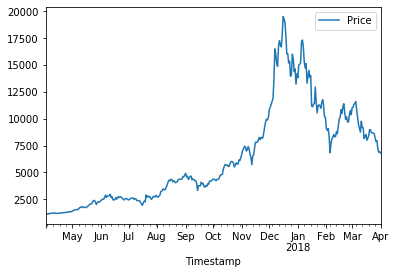

In [ ]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

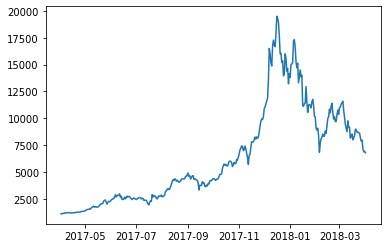

In [ ]:
plt.plot(df.index, df['Price'])

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

In [ ]:
x = np.arange(-10, 11)

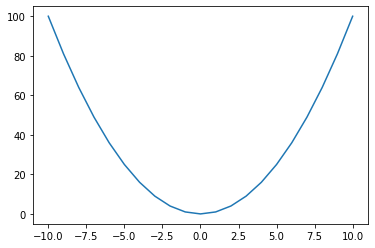

In [ ]:
plt.plot(x, x ** 2)

We're using `matplotlib`'s global API, which is horrible but it's the most popular one. We'll learn later how to use the _OOP_ API which will make our work much easier.

In [ ]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My Nice Plot')

Some of the arguments in `plt.figure` and `plt.plot` are available in the pandas' `plot` interface:

In [ ]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## A more challenging parsing

To demonstrate plotting two columns together, we'll try to add Ether prices to our `df` DataFrame. The ETH prices data can be found in the `data/eth-price.csv` file. The problem is that it seems like that CSV file was created by someone who really hated programmers. Take a look at it and see how ugly it looks like. We'll still use `pandas` to parse it.

In [ ]:
eth = pd.read_csv('data/eth-price.csv')

eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


As you can see, it has a `Value` column (which represents the price), a `Date(UTC)` one that has a string representing dates and also a `UnixTimeStamp` date represeting the datetime in unix timestamp format. The header is read automatically, let's try to parse dates with the CSV Reader:

In [ ]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True)

print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


Seems like the `parse_dates` attribute didn't work. We'll need to add a little bit more customization. Let's divide this problem and focus on the problem of "date parsing" first. The simplest option would be to use the `UnixTimeStamp` column. The `pandas` module has a `to_datetime` function that converts Unix timestamps to Datetime objects automatically:

In [ ]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

The problem is the precision of unix timestamps. To match both columns we'll need to use the same index and, our `df` containing Bitcoin prices, is "per day":

In [ ]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


We could either, remove the precision of `UnixTimeStamp` or attempt to parse the `Date(UTC)`. Let's do String parsing of `Date(UTC)` for fun:

In [ ]:
pd.to_datetime(eth['Date(UTC)']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

That seems to work fine! Why isn't it then parsing the `Date(UTC)` column? Simple, the `parse_dates=True` parameter will instruct pandas to parse the index of the `DataFrame`. If you want to parse any other column, you must explicitly pass the column position or name:

In [ ]:
pd.read_csv('data/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Putting everything together again:

In [ ]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


We can now combine both `DataFrame`s into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty `DataFrame` and with the index from Bitcoin prices:

In [ ]:
prices = pd.DataFrame(index=df.index)

In [ ]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


And we can now just set columns from the other `DataFrame`s:

In [ ]:
prices['Bitcoin'] = df['Price']

In [ ]:
prices['Ether'] = eth['Value']

In [ ]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


We can now try plotting both values:

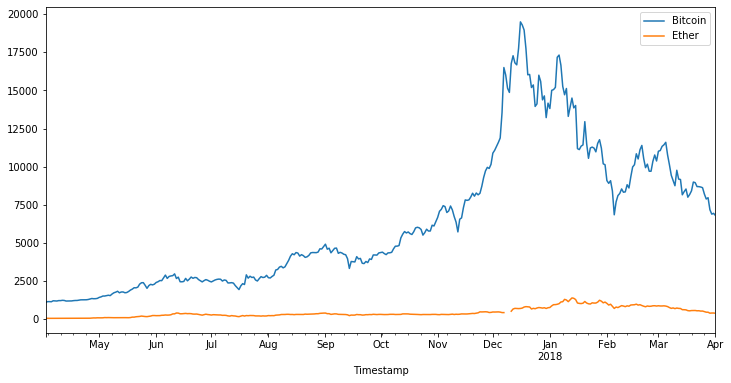

In [ ]:
prices.plot(figsize=(12, 6))

🤔seems like there's a tiny gap between Dec 2017 and Jan 2018. Let's zoom in there:

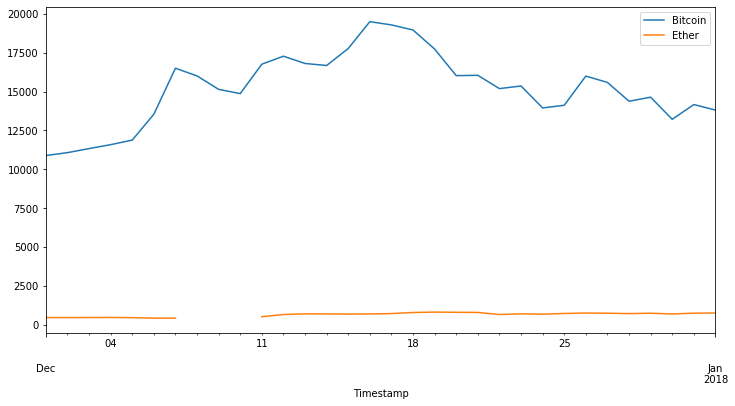

In [ ]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))

Oh no, missing data. We'll learn how to deal with that later.

Btw, did you note that fancy indexing `'2017-12-01':'2018-01-01'` 😏. That's pandas power 💪. We'll learn how to deal with TimeSeries later too.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


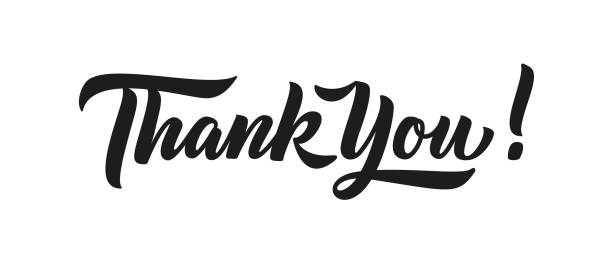